In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

tf.reset_default_graph()
sess = tf.Session()
x_vals = np.arange(0,30, 0.1)
y_vals = 2*x_vals + 5 + 2*np.random.randn(x_vals.shape[0])

In [2]:
learning_rate = 0.0001
batch_size = 1000
regularization_factor = 1

x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

In [3]:
model_output = tf.add(tf.matmul(x_data, A), b)

regularization_loss = tf.reduce_mean(tf.multiply(tf.pow(A,2), regularization_factor))
mse_loss = tf.div(tf.reduce_mean(tf.square(y_target - model_output)),2.0) 
loss = tf.add(mse_loss, regularization_loss)

my_opt = tf.train.GradientDescentOptimizer(learning_rate = learning_rate)
train_step = my_opt.minimize(loss)

init = tf.global_variables_initializer()
sess.run(init)

In [4]:
loss_vec = []

for i in range(1000):
    rand_index = np.random.choice(x_vals.shape[0], size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    sess.run(train_step, feed_dict={x_data: rand_x, y_target:rand_y})
    loss_vec.append(temp_loss)
    
    if (i+1)%100==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + 'b = ' + str(sess.run(b)))
        print('Loss = ''' + str(temp_loss))

Step #100 A = [[ 2.09277225]]b = [[ 0.46201882]]
Loss = 11.7685
Step #200 A = [[ 2.20567346]]b = [[ 0.48095706]]
Loss = 9.49018
Step #300 A = [[ 2.21145129]]b = [[ 0.49444625]]
Loss = 9.24266
Step #400 A = [[ 2.2110014]]b = [[ 0.50764453]]
Loss = 9.41261
Step #500 A = [[ 2.21013236]]b = [[ 0.52079248]]
Loss = 9.65821
Step #600 A = [[ 2.20877242]]b = [[ 0.53387392]]
Loss = 9.14987
Step #700 A = [[ 2.20859456]]b = [[ 0.54695702]]
Loss = 9.04131
Step #800 A = [[ 2.20818353]]b = [[ 0.55990654]]
Loss = 8.99589
Step #900 A = [[ 2.20669651]]b = [[ 0.5727883]]
Loss = 9.42691
Step #1000 A = [[ 2.20657849]]b = [[ 0.58584869]]
Loss = 9.72829


In [5]:
[slope] = sess.run(A)
[y_intercept] = sess.run(b)
best_fit = []
for i in x_vals:
    best_fit.append(slope*i+y_intercept)

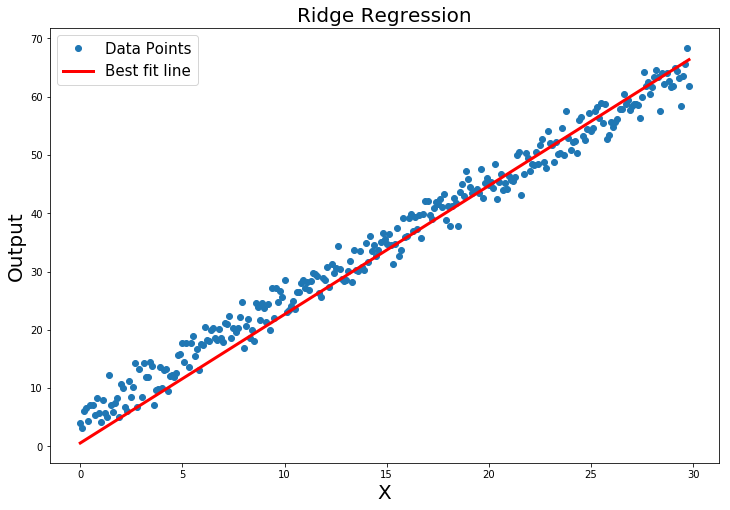

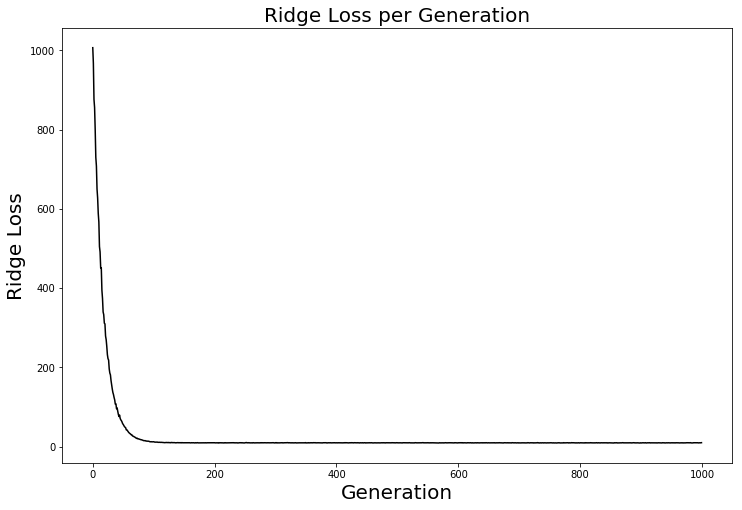

In [6]:
plt.figure(figsize=[12,8])
plt.plot(x_vals[:-1], y_vals[:-1], 'o', label='Data Points')
plt.plot(x_vals[:-1], np.array(best_fit[:-1]), 'r-', label='Best fit line', linewidth=3)
plt.legend(loc='upper left', fontsize = 15)
plt.title('Ridge Regression', fontsize = 20)
plt.xlabel('X', fontsize = 20)
plt.ylabel('Output', fontsize = 20)
plt.show()


plt.figure(figsize=[12,8])
plt.plot(np.array(loss_vec)[:], 'k-')
plt.title('Ridge Loss per Generation', fontsize = 20)
plt.xlabel('Generation', fontsize = 20)
plt.ylabel('Ridge Loss', fontsize = 20)
plt.show()